In [ ]:
from typing import Annotated, Literal

from langgraph.graph import END, START, StateGraph
from langgraph.graph.message import BaseMessage, add_messages
from pydantic import BaseModel

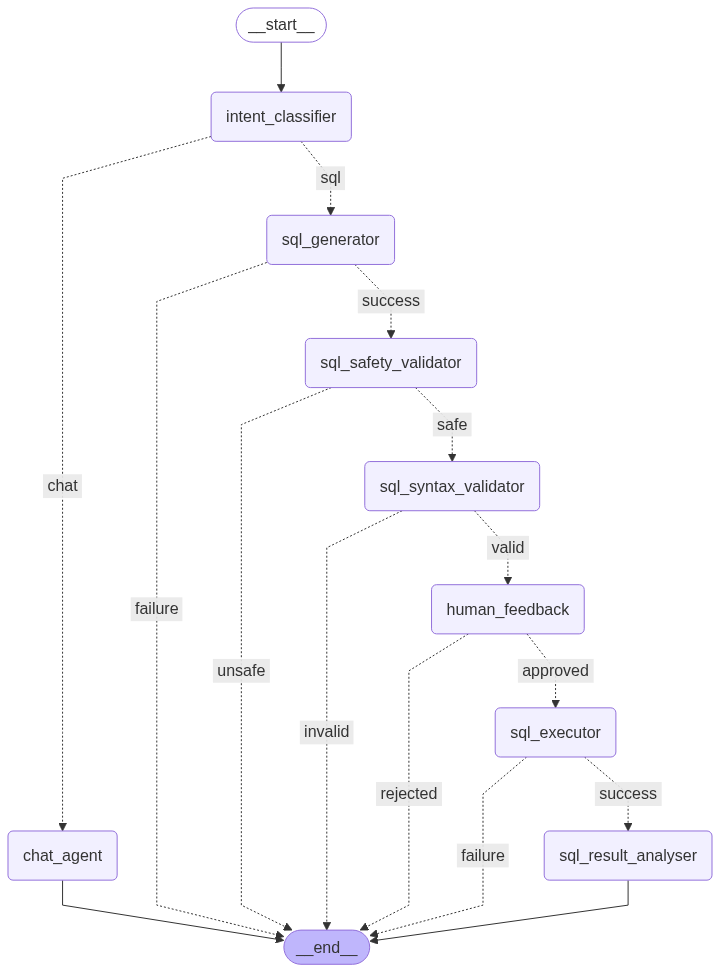

In [2]:
# ===============================
# State
# ===============================


class State(BaseModel):
    messages: Annotated[list[BaseMessage], add_messages]
    user_intent: Literal["sql", "chat"] | None = None
    sql_query: str | None = None
    sql_safety_status: Literal["safe", "unsafe"] | None = None
    sql_syntax_status: Literal["valid", "invalid"] | None = None
    user_feedback_status: Literal["approved", "rejected"] | None = None
    sql_execution_status: Literal["success", "failure"] | None = None
    sql_result: str | None = None


# ===============================
# Agent Nodes
# ===============================


def intent_classifier(state) -> dict:
    pass


def chat_agent(state) -> dict:
    pass


def sql_generator(state) -> dict:
    pass


def sql_safety_validator(state) -> dict:
    pass


def sql_syntax_validator(state) -> dict:
    pass


def human_feedback(state) -> dict:
    pass


def sql_executor(state) -> dict:
    pass


def sql_result_analyser(state) -> dict:
    pass


# ===============================
# Node Rounters
# ===============================


def route_intent(state) -> Literal["sql", "chat"]:
    pass


def check_sql_generation(state) -> Literal["success", "failure"]:
    pass


def check_sql_safety(state) -> Literal["safe", "unsafe"]:
    pass


def check_sql_syntax(state) -> Literal["valid", "invalid"]:
    pass


def check_human_feedback(state) -> Literal["approved", "rejected"]:
    pass


def check_sql_execution(state) -> Literal["success", "failure"]:
    pass


# ===============================
# Graph
# ===============================

# State Workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("intent_classifier", intent_classifier)
workflow.add_node("chat_agent", chat_agent)
workflow.add_node("sql_generator", sql_generator)
workflow.add_node("sql_safety_validator", sql_safety_validator)
workflow.add_node("sql_syntax_validator", sql_syntax_validator)
workflow.add_node("human_feedback", human_feedback)
workflow.add_node("sql_executor", sql_executor)
workflow.add_node("sql_result_analyser", sql_result_analyser)

# Add Edges
workflow.add_edge(START, "intent_classifier")

workflow.add_conditional_edges(
    "intent_classifier",
    route_intent,
    {
        "sql": "sql_generator",
        "chat": "chat_agent",
    },
)

workflow.add_conditional_edges(
    "sql_generator",
    check_sql_generation,
    {
        "success": "sql_safety_validator",
        "failure": END,
    },
)

workflow.add_conditional_edges(
    "sql_safety_validator",
    check_sql_safety,
    {
        "safe": "sql_syntax_validator",
        "unsafe": END,
    },
)

workflow.add_conditional_edges(
    "sql_syntax_validator",
    check_sql_syntax,
    {
        "valid": "human_feedback",
        "invalid": END,
    },
)

workflow.add_conditional_edges(
    "human_feedback",
    check_human_feedback,
    {
        "approved": "sql_executor",
        "rejected": END,
    },
)

workflow.add_conditional_edges(
    "sql_executor",
    check_sql_execution,
    {
        "success": "sql_result_analyser",
        "failure": END,
    },
)

workflow.add_edge("sql_result_analyser", END)
workflow.add_edge("chat_agent", END)

# Compile Graph
graph = workflow.compile()

# Display Graph
display(graph)